# Predicting The Prices Of Cars

This project serves as an introduction to machine learning. The task is to predict the prices of cars. The dataset can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data) and information about the dataset is found [here](https://archive.ics.uci.edu/ml/datasets/automobile).

**Objective:** The objective is to identify the best model to predict the prices of cars. Specifically, we want to reduce the root mean squared error (RMSE). 

**Techniques used:**
* sklearn.neighbors, sklearn.metrics
* pandas, numpy
* Univariate K-nearest neighbour model
* Multivariate K-nearest neighbour model
* Data normalization
* Matplotlib
* Data visualization

## Introduce dataset

In [1]:
import pandas as pd
import numpy as np

cars = pd.read_csv('imports-85.data')
cars.head(5)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [2]:
pd.options.display.max_columns = 99

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv('imports-85.data', names=cols)

cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


In [3]:
numeric_cols = ['normalized-losses',
                'wheel-base',
                'length',
                'width',
                'height',
                'curb-weight',
                'engine-size',
                'bore',
                'stroke',
                'compression-rate',
                'horsepower',
                'peak-rpm',
                'city-mpg',
                'highway-mpg',
                'price'
               ]

cars = cars[numeric_cols]

cars

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.00,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.00,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.00,115,5500,18,22,17450
5,?,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.50,110,5500,19,25,15250
6,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.50,110,5500,19,25,17710
7,?,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.50,110,5500,19,25,18920
8,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.30,140,5500,17,20,23875
9,?,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.00,160,5500,16,22,?


## Data cleaning

In [4]:
cars = cars.replace('?', np.nan)

cars

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.00,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.00,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.00,115,5500,18,22,17450
5,NaN,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.50,110,5500,19,25,15250
6,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.50,110,5500,19,25,17710
7,NaN,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.50,110,5500,19,25,18920
8,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.30,140,5500,17,20,23875
9,NaN,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.00,160,5500,16,22,NaN


In [5]:
cars = cars.astype('float')
cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [6]:
cars = cars.dropna(subset = ['price'])
cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [7]:
cars

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.00,111.0,5000.0,21.0,27.0,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.00,111.0,5000.0,21.0,27.0,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.00,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.00,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.00,115.0,5500.0,18.0,22.0,17450.0
5,NaN,99.8,177.3,66.3,53.1,2507.0,136.0,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,15250.0
6,158.0,105.8,192.7,71.4,55.7,2844.0,136.0,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,17710.0
7,NaN,105.8,192.7,71.4,55.7,2954.0,136.0,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,18920.0
8,158.0,105.8,192.7,71.4,55.9,3086.0,131.0,3.13,3.40,8.30,140.0,5500.0,17.0,20.0,23875.0
10,192.0,101.2,176.8,64.8,54.3,2395.0,108.0,3.50,2.80,8.80,101.0,5800.0,23.0,29.0,16430.0


In [8]:
cars = cars.drop('normalized-losses', 1)

cars

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.00,111.0,5000.0,21.0,27.0,13495.0
1,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.00,111.0,5000.0,21.0,27.0,16500.0
2,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.00,154.0,5000.0,19.0,26.0,16500.0
3,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.00,102.0,5500.0,24.0,30.0,13950.0
4,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.00,115.0,5500.0,18.0,22.0,17450.0
5,99.8,177.3,66.3,53.1,2507.0,136.0,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,15250.0
6,105.8,192.7,71.4,55.7,2844.0,136.0,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,17710.0
7,105.8,192.7,71.4,55.7,2954.0,136.0,3.19,3.40,8.50,110.0,5500.0,19.0,25.0,18920.0
8,105.8,192.7,71.4,55.9,3086.0,131.0,3.13,3.40,8.30,140.0,5500.0,17.0,20.0,23875.0
10,101.2,176.8,64.8,54.3,2395.0,108.0,3.50,2.80,8.80,101.0,5800.0,23.0,29.0,16430.0


In [9]:
cars = cars.fillna(cars.mean())

cars.isnull().sum()

wheel-base          0
length              0
width               0
height              0
curb-weight         0
engine-size         0
bore                0
stroke              0
compression-rate    0
horsepower          0
peak-rpm            0
city-mpg            0
highway-mpg         0
price               0
dtype: int64

## Normalize all data but price

In [10]:
price = cars['price']
cars = (cars - cars.min()) / (cars.max() - cars.min())
cars['price'] = price

cars

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.125000,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.187500,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.062500,0.313084,0.551020,0.138889,0.157895,17450.0
5,0.384840,0.540299,0.512821,0.441667,0.395268,0.283019,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,15250.0
6,0.559767,0.770149,0.948718,0.658333,0.525989,0.283019,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,17710.0
7,0.559767,0.770149,0.948718,0.658333,0.568658,0.283019,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,18920.0
8,0.559767,0.770149,0.948718,0.675000,0.619860,0.264151,0.421429,0.633333,0.081250,0.429907,0.551020,0.111111,0.105263,23875.0
10,0.425656,0.532836,0.384615,0.541667,0.351823,0.177358,0.685714,0.347619,0.112500,0.247664,0.673469,0.277778,0.342105,16430.0


## Univariate k-nearest neighbors model

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train, target, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    #Shuffle the order of rows
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    #Separate dataset in 2 to have a training and testing set
    mid = int(len(rand_df) / 2)
    
    train_df = rand_df[:mid]
    test_df = rand_df[mid:]
    
    #Fit KNN model with default k
    knn.fit(train_df[[train]], train_df[target])
    
    #Predict
    prediction = knn.predict(test_df[[train]])
    
    #MSE and RMSE
    mse = mean_squared_error(test_df[target], prediction)
    rmse = np.sqrt(mse)
    
    return rmse

#Calculate the RMSE for each column
rmse_results = {}
train_cols = cars.columns.drop('price')

for each in train_cols:
    rmse = knn_train_test(each, 'price', cars)
    rmse_results[each] = rmse
    
#Sort from lowest to highest
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

engine-size         3238.462830
horsepower          4037.037713
curb-weight         4401.118255
highway-mpg         4630.026799
width               4704.482590
city-mpg            4766.422505
length              5427.200961
wheel-base          5461.553998
compression-rate    6610.812153
bore                6780.627785
peak-rpm            7697.459696
stroke              8006.529545
height              8144.441043
dtype: float64

## Allowing varying k

In [12]:
def knn_train_test(train, target, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    mid = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:mid]
    test_df = rand_df.iloc[mid:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train]], train_df[target])

        # Make predictions using model.
        prediction = knn.predict(test_df[[train]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target], prediction)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
train_cols = cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', cars)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'bore': {1: 8602.5884845006603,
  3: 6984.2394894809158,
  5: 6780.6277846859757,
  7: 6878.0979659215318,
  9: 6866.8085020384133},
 'city-mpg': {1: 5901.1435743547636,
  3: 4646.7464087271546,
  5: 4766.4225050901341,
  7: 5232.5230341673159,
  9: 5465.2094925275333},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.0636855783587,
  5: 6610.8121531591287,
  7: 6732.8012829415147,
  9: 7024.4855254634349},
 'curb-weight': {1: 5264.2902307588784,
  3: 5022.3180117572329,
  5: 4401.1182547931239,
  7: 4330.6081044180528,
  9: 4632.0444744544011},
 'engine-size': {1: 3258.4861059962027,
  3: 2840.5628056435012,
  5: 3238.4628296477176,
  7: 3563.0867742564151,
  9: 3831.8244149840766},
 'height': {1: 8904.0464563607093,
  3: 8277.6096430455254,
  5: 8144.4410426637469,
  7: 7679.5981243937731,
  9: 7811.0360629122297},
 'highway-mpg': {1: 6025.5949667207387,
  3: 4617.3050197885541,
  5: 4630.0267985880564,
  7: 4796.0614401869461,
  9: 5278.3580569539872},
 'horsepower': {1: 4170.

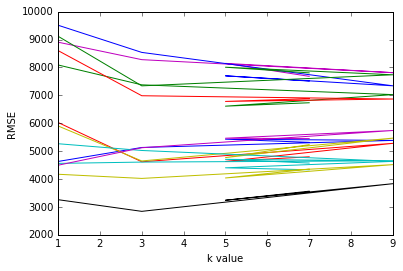

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

## Multivariate k-nearest neighbors model

In [14]:
def knn_train_test(train, target, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    mid = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:mid]
    test_df = rand_df.iloc[mid:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train], train_df[target])

        # Make predictions using model.
        prediction = knn.predict(test_df[train])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target], prediction)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

multi_k_rmse_results = {}

top_2 = ['engine-size', 'horsepower']
top_3 = ['engine-size', 'horsepower', 'width']
top_4 = ['engine-size', 'horsepower', 'width', 'highway-mpg']
top_5 = ['engine-size', 'horsepower', 'width', 'highway-mpg', 'city-mpg']


multi_k_rmse_results['top_2'] = knn_train_test(top_2, 'price', cars)
multi_k_rmse_results['top_3'] = knn_train_test(top_3, 'price', cars)
multi_k_rmse_results['top_4'] = knn_train_test(top_4, 'price', cars)
multi_k_rmse_results['top_5'] = knn_train_test(top_5, 'price', cars)

multi_k_rmse_results

{'top_2': {5: 2949.8817277180374},
 'top_3': {5: 3580.7376651928435},
 'top_4': {5: 3546.5585085619928},
 'top_5': {5: 3468.3097349322402}}

## Varying K

In [16]:
def knn_train_test(train, target, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    mid = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:mid]
    test_df = rand_df.iloc[mid:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train], train_df[target])

        # Make predictions using model.
        prediction = knn.predict(test_df[train])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target], prediction)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

multi_k_rmse_results['top_2'] = knn_train_test(top_2, 'price', cars)
multi_k_rmse_results['top_4'] = knn_train_test(top_4, 'price', cars)
multi_k_rmse_results['top_5'] = knn_train_test(top_5, 'price', cars)

multi_k_rmse_results

{'top_2': {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.5865730316732,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.6819690204961,
  8: 3413.2283591920091,
  9: 3748.6716603306486,
  10: 4080.7125057341937,
  11: 4215.6372280600335,
  12: 4275.4215242778719,
  13: 4373.9016830354958,
  14: 4424.2851372398154,
  15: 4539.5054930959368,
  16: 4667.3076714467679,
  17: 4729.6053058442258,
  18: 4790.5566321590941,
  19: 4824.3866193292615,
  20: 4840.8509146938286,
  21: 4837.4290620002712,
  22: 4831.1698826759703,
  23: 4861.6794929592752,
  24: 4903.3460088625789},
 'top_3': {5: 3580.7376651928435},
 'top_4': {1: 3248.9874645117447,
  2: 3289.0282853574226,
  3: 3255.9500616840569,
  4: 3381.4672958672545,
  5: 3546.5585085619928,
  6: 3698.4038616729522,
  7: 3620.7285751952463,
  8: 3714.3243323621755,
  9: 3952.5980325222104,
  10: 4039.4236739323037,
  11: 4207.4947456137215,
  12: 4277.4649137006418,
  13: 4348.2186734164152,
  1

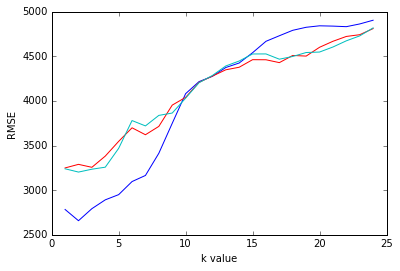

In [18]:
for k,v in multi_k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')